## TD Learning

We have a line of 7 states:

Start   Non-terminal States   Terminal

 0        1  2  3  4  5          6



*   States 1–5 are the walkable states
*   State 0 = terminal (left)
*   State 6 = terminal (right)

Each episode begins at the middle state:
Start at state 3 (Reference--> Sutton & Barto)

The policy is a uniform random policy:

At every non-terminal state:
*   With probability 0.5 → move left
*   With probability 0.5 → move right


The walk ends when the agent reaches 0 or 6.

Reward Structure:

*   Reward = +1 when you hit state 6
*   Reward = 0 otherwise
*   No negative reward for state 0
*   No reward for intermediate steps

Goal:

Use TD(0) to learn the state-value function:

V(s)=expected return starting from state s

The true values form a perfect straight line between 0 and 1.

**TD(0) Update Rule**

For a transition:
S -> S'

with reward
r:

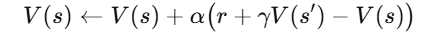


For random walk:

gamma=1, alpha = 0.1, update only for states 1-5.



Conclusion:

“This example is prediction.
Your assignment is control (Q-learning).
Prediction tells us how good states are.
Control tells us what action to choose.”
















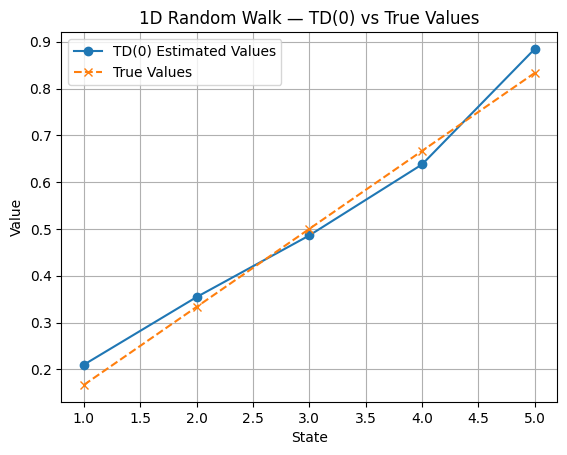

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# States 0 and 6 are terminal
V = np.zeros(7)
V[1:6] = 0.5  # initial guess

alpha = 0.1
gamma = 1.0
episodes = 100

for ep in range(episodes):

    state = 3  # start in middle

    while True:
        step = np.random.choice([-1, 1])
        next_state = state + step

        reward = 1 if next_state == 6 else 0

        if state not in [0, 6]:
            V[state] += alpha * (reward + gamma * V[next_state] - V[state])

        if next_state in [0, 6]:
            break

        state = next_state

# TRUE values for comparison
true_states = np.array([1, 2, 3, 4, 5])
true_values = true_states / 6.0

# PLOT
plt.plot(true_states, V[1:6], marker='o', label="TD(0) Estimated Values")
plt.plot(true_states, true_values, marker='x', linestyle='--', label="True Values")

plt.xlabel("State")
plt.ylabel("Value")
plt.title("1D Random Walk — TD(0) vs True Values")
plt.legend()
plt.grid(True)
plt.show()
